# Visualizations Draft Page 
#### - Sam

To view source code for this page, visit our repo @ https://github.com/sam-thurman/dsc-mod-1-project-seattle-ds and navigate to `src/viz_scripts/numeric_visualizations.py`

In [1]:
!ls

01_erh_download_and_explore_data.ipynb opportunity_youth.sqlite
02_samt_exploratory.ipynb              oy_by_age.csv
02_samt_v2_exploratory.ipynb           oy_df.csv
Kyle_Exploration.ipynb                 oy_df_16_18.csv
README.md                              oy_df_19_21.csv
age_data.csv                           oy_df_22_24.csv
ay_df.csv                              project_outcomes.ipynb
ay_df_16_18.csv                        racial_data.csv
ay_df_19_21.csv                        ry_df.csv
ay_df_22_24.csv                        ry_df_16_18.csv
kyle_the_seconding.ipynb               ry_df_19_21.csv
opportunity_youth                      ry_df_22_24.csv


Check conda environment:

In [2]:
!which python

/Users/sam/opt/anaconda3/envs/oy-env/bin/python


In [3]:
%load_ext autoreload
%autoreload 2

Import tools:

In [4]:
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.data import data_collection

Import scripts:

In [5]:
import src.viz_scripts.numeric_visualization as viz

In [6]:
full_dfs, racial_df, age_df_dict, oy_by_age_df = viz.import_and_assign()

## VIZ: 
#### OY in 2016 vs. 2020

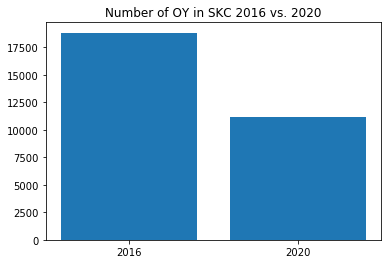

In [7]:
viz.plot_16_v_20(full_dfs)

## VIZ:
#### OY by Age

Gathering required variables:

In [8]:
ay_age_group_val_list, oy_age_group_val_list, oy_percentage_of_age_pop, age_group_strings = viz.get_age_plot_reqs(age_df_dict)

Plot just percent:

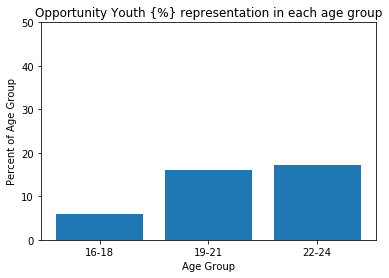

In [9]:
viz.plot_percent_oy_by_age(oy_percentage_of_age_pop, age_group_strings)

Plot percent **and** OY & AY stats by age

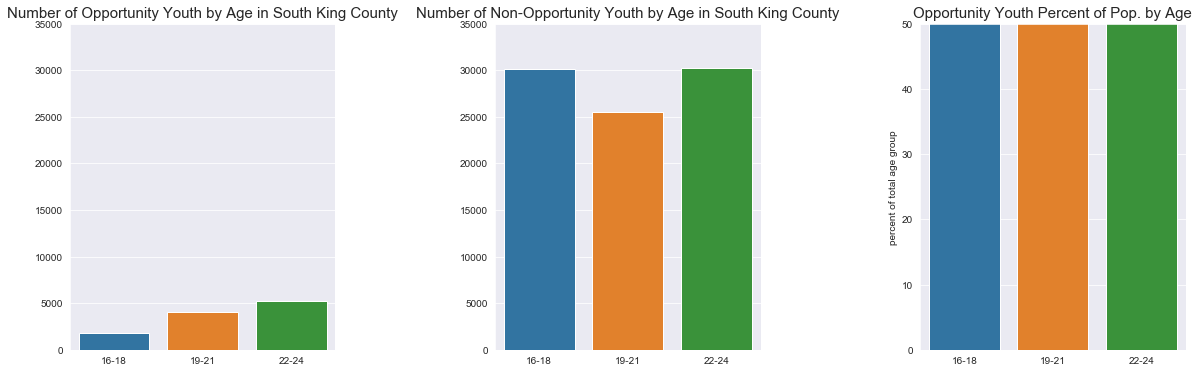

In [10]:
viz.plot_in_depth_age(oy_age_group_val_list, ay_age_group_val_list, age_group_strings, oy_percentage_of_age_pop)

## VIZ:
#### OY by Race

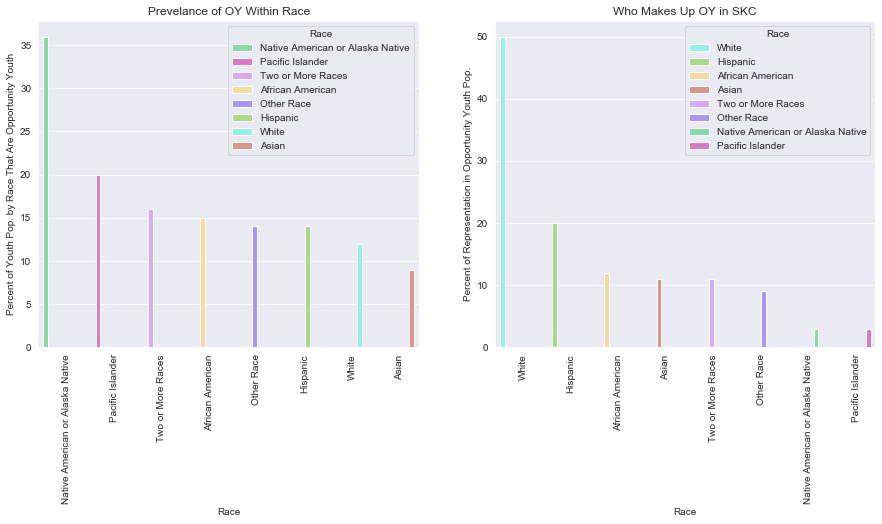

In [11]:
viz.plot_racial_representation(racial_df)

## VIZ:
#### total pop. diploma/work status by age

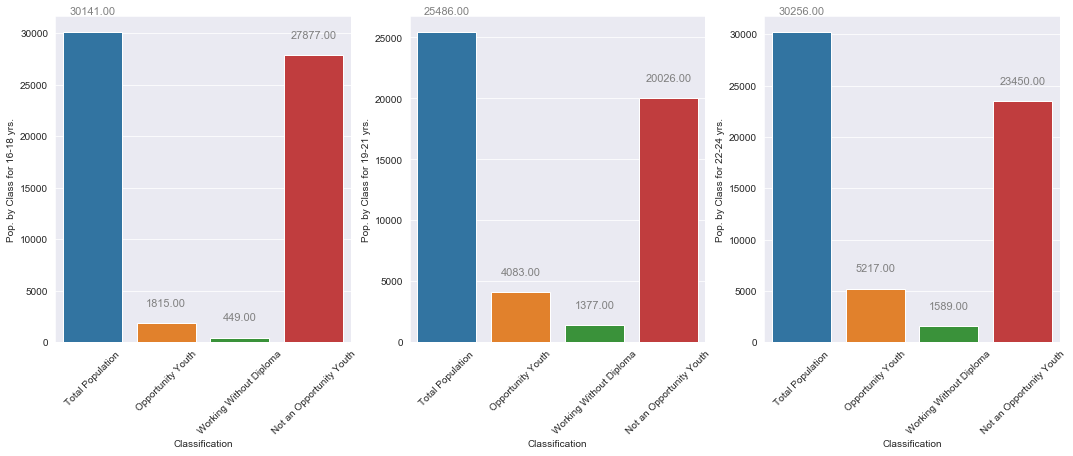

In [12]:
viz.plot_working_diploma_status(oy_by_age_df)